In [1]:
import pandas as pd
import numpy as np
from numpy import where
import collections
from collections import Counter
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

In [2]:
h20 = pd.read_excel('/Users/mac/Desktop/TFG/data/tables/ARG/household/2020/EPH_usu_4_Trim_2020_xls/EPH_usu_personas_4to.trim2020.xls.xlsx')  
h20

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNOPXXHJOLNCDEOJAH00697825,2020,4,1,1,44,NO,93,68,1,...,NaN,10.0,9,142,1,0,2,0,0,0
1,TQRMNOPURHLKKMCDEHJGH00649393,2020,4,1,1,40,SI,23,275,1,...,12.0,NaN,12,0,96,0,98,0,0,0
2,TQRMNOPTRHLNLLCDEHGHJ00649114,2020,4,1,1,44,NO,20,156,1,...,NaN,12.0,12,0,2,0,1,0,0,0
3,TQRMNOQTUHLNLLCDEHGHJ00649100,2020,4,1,1,44,NO,20,154,1,...,NaN,10.0,9,175,1,0,98,0,0,0
4,TQRMNOSTRHMNLMCDEHGHJ00681142,2020,4,2,1,44,NO,20,110,2,...,NaN,5.0,4,106,1,0,98,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14437,TQRMNOQVVHKKLNCDEGJBF00661088,2020,4,1,1,43,SI,13,3575,2,...,8.0,NaN,8,3571,1,0,98,0,0,0
14438,TQRMNOPQSHMKLQCDEGJBF00642395,2020,4,1,1,43,SI,13,3500,2,...,1.0,NaN,1,3518,1,0,98,0,0,0
14439,TQRMNOPQPHLLLOCDEGJBF00648305,2020,4,1,1,43,SI,13,1551,2,...,4.0,NaN,4,1608,1,0,98,0,0,0
14440,TQRMNOPQRHLLLOCDEGJBF00648291,2020,4,1,1,43,SI,13,1303,2,...,7.0,NaN,6,1343,1,2,98,0,0,0


In [3]:
for col in h20.columns:
    print(col)

CODUSU
ANO4
TRIMESTRE
NRO_HOGAR
REALIZADA
REGION
MAS_500
AGLOMERADO
PONDERA
IV1
IV1_ESP
IV2
IV3
IV3_ESP
IV4
IV5
IV6
IV7
IV7_ESP
IV8
IV9
IV10
IV11
IV12_1
IV12_2
IV12_3
II1
II2
II3
II3_1
II4_1
II4_2
II4_3
II5
II5_1
II6
II6_1
II7
II7_ESP
II8
II8_ESP
II9
V1
V2
V21
V22
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19_A
V19_B
IX_TOT
IX_MEN10
IX_MAYEQ10
ITF
DECIFR
IDECIFR
RDECIFR
GDECIFR
PDECIFR
ADECIFR
IPCF
DECCFR
IDECCFR
RDECCFR
GDECCFR
PDECCFR
ADECCFR
PONDIH
VII1_1
VII1_2
VII2_1
VII2_2
VII2_3
VII2_4


In [4]:
var20 = h20[['IV1', 'IV2','IV6','IV8', 'IV9','IV12_1', 'II2','II4_1', 'II4_3','V1', 'ITF', 'IPCF','AGLOMERADO']]
var20

,IV1,IV2,IV6,IV8,IV9,IV12_1,II2,II4_1,II4_3,V1,ITF,IPCF,AGLOMERADO
0,1,2,1,1,1,2,1,1,2,1,115000,57500.00,93
1,1,5,1,1,1,2,4,1,2,1,0,0.00,23
2,1,3,1,1,1,2,1,1,1,2,0,0.00,20
3,1,4,1,1,1,2,1,1,1,1,51000,51000.00,20
4,2,3,1,1,1,2,2,1,2,1,35000,17500.00,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14437,2,1,1,1,2,2,1,1,2,1,30000,30000.00,13
14438,2,1,1,1,1,2,1,1,2,2,11000,5500.00,13
14439,2,3,1,1,1,2,1,1,2,2,15000,15000.00,13
14440,2,1,1,1,1,2,1,1,2,1,48000,24000.00,13


In [5]:
var20.value_counts()

IV1  IV2  IV6  IV8  IV9  IV12_1  II2  II4_1  II4_3  V1  ITF    IPCF      AGLOMERADO
1    3    1    1    1    2       2    1      2      1   0      0.00      33            33
                                             1      1   0      0.00      33            24
                                             2      1   0      0.00      3             23
                                                                         4             18
     2    1    1    1    2       2    1      2      1   0      0.00      33            17
                                                                                       ..
     3    1    1    1    2       2    1      1      1   95000  31666.67  5              1
                                                                         17             1
                                                                         33             1
                                                                         34             1
6    5    1    1

In [6]:
null_counts = var20.isnull().sum()
print(null_counts)

IV1           0
IV2           0
IV6           0
IV8           0
IV9           0
IV12_1        0
II2           0
II4_1         0
II4_3         0
V1            0
ITF           0
IPCF          0
AGLOMERADO    0
dtype: int64


In [7]:
print(var20.describe())

                IV1           IV2           IV6           IV8           IV9  \
count  14442.000000  14442.000000  14442.000000  14442.000000  14442.000000   
mean       1.197895      3.124983      1.021673      1.002839      1.028528   
std        0.460053      2.297899      0.155729      0.053208      0.183497   
min        1.000000      1.000000      1.000000      1.000000      0.000000   
25%        1.000000      2.000000      1.000000      1.000000      1.000000   
50%        1.000000      3.000000      1.000000      1.000000      1.000000   
75%        1.000000      4.000000      1.000000      1.000000      1.000000   
max        6.000000     99.000000      3.000000      2.000000      3.000000   

             IV12_1           II2         II4_1         II4_3            V1  \
count  14442.000000  14442.000000  14442.000000  14442.000000  14442.000000   
mean       1.939828      1.889558      1.074089      1.673175      1.223861   
std        0.237813      0.859931      0.264818    

                 IV1       IV2       IV6       IV8       IV9    IV12_1  \
IV1         1.000000 -0.114841  0.071582  0.039283  0.047960  0.053781   
IV2        -0.114841  1.000000 -0.067945  0.016354 -0.066100 -0.029955   
IV6         0.071582 -0.067945  1.000000  0.201502  0.387896 -0.054535   
IV8         0.039283  0.016354  0.201502  1.000000 -0.299087 -0.002917   
IV9         0.047960 -0.066100  0.387896 -0.299087  1.000000 -0.079675   
IV12_1      0.053781 -0.029955 -0.054535 -0.002917 -0.079675  1.000000   
II2        -0.189978  0.294658 -0.061757 -0.047631 -0.048930 -0.042995   
II4_1       0.044478 -0.055615  0.110504  0.068618  0.083329 -0.030366   
II4_3       0.187096 -0.131061  0.081525  0.037050  0.074283 -0.042692   
V1          0.027215 -0.032251 -0.007457 -0.015990 -0.010056  0.048040   
ITF        -0.012055  0.106387 -0.055732 -0.022024 -0.047671  0.007053   
IPCF        0.089464  0.013560 -0.055534 -0.017854 -0.047496  0.042622   
AGLOMERADO  0.002610  0.006505 -0.0068

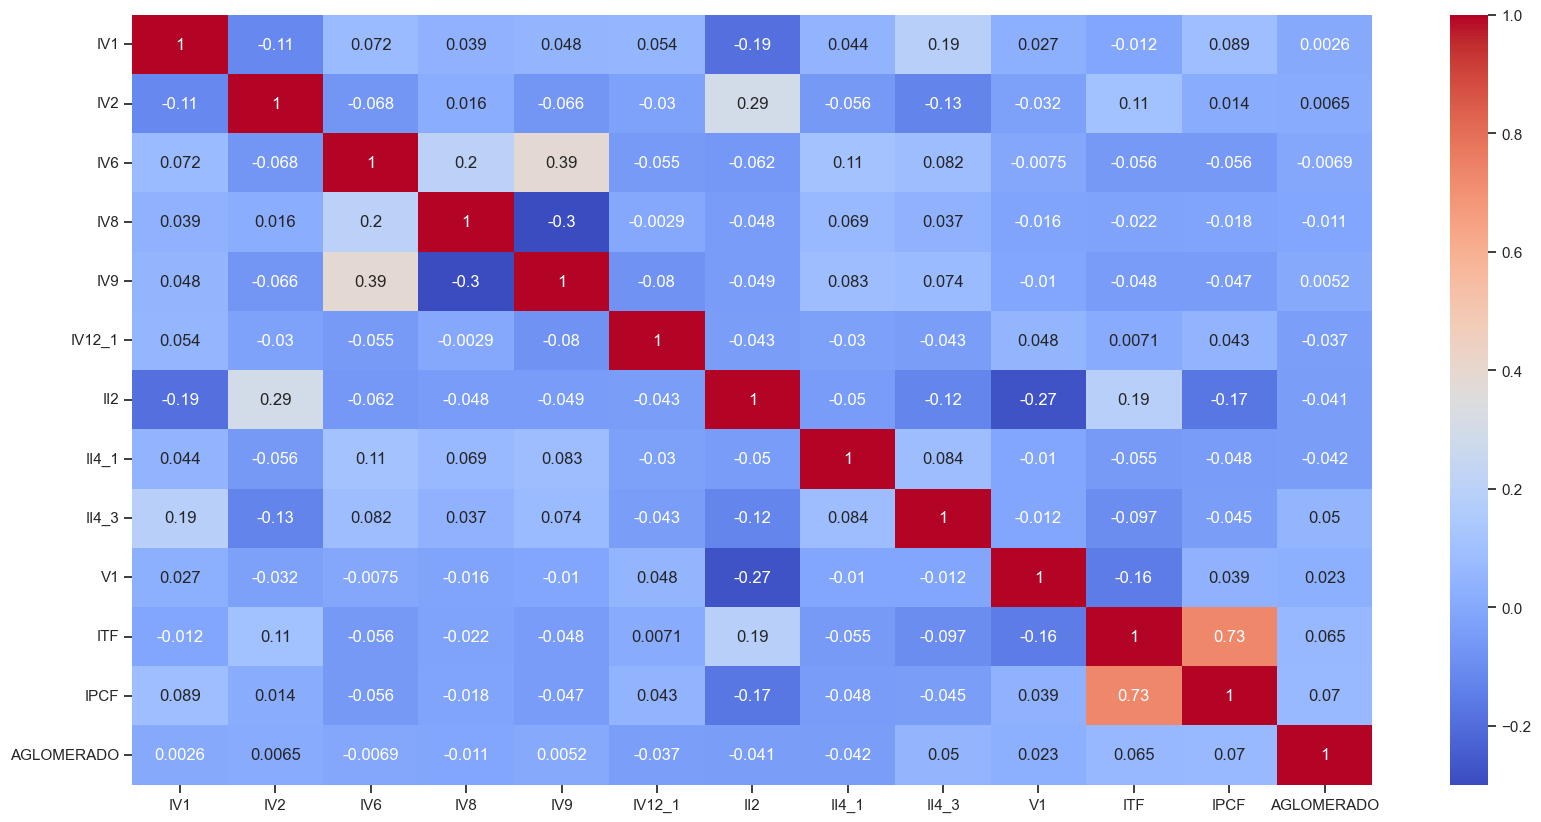

In [8]:
print(var20.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(var20.corr(), annot=True, cmap='coolwarm')
plt.show()

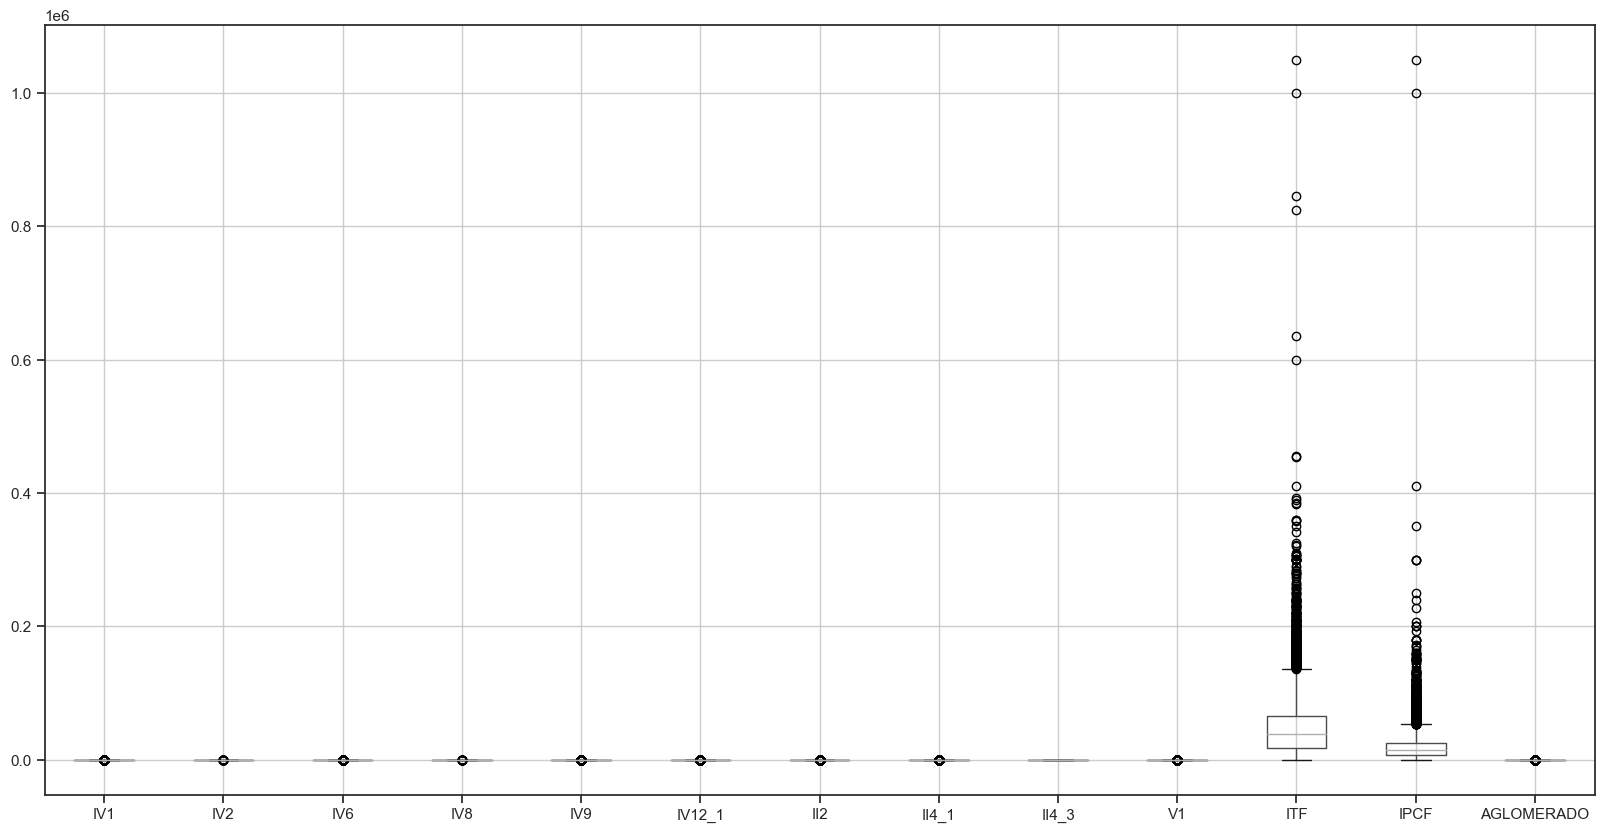

In [9]:
var20.boxplot(figsize=(20,10))
plt.show()

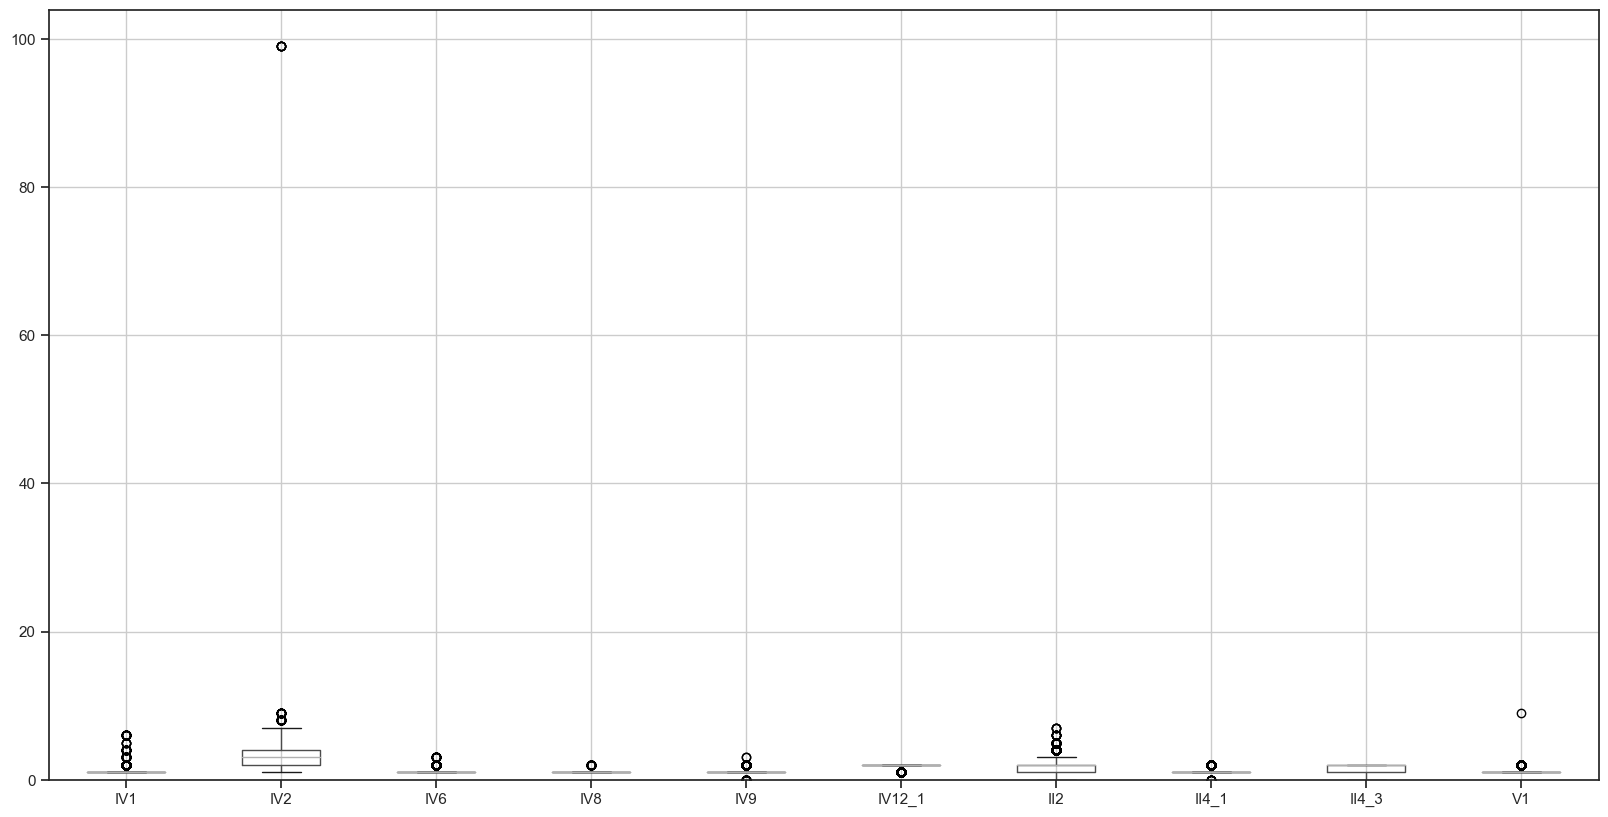

In [10]:
box=var20.drop(['ITF','IPCF','AGLOMERADO'],axis=1)
box.boxplot(figsize=(20,10))
plt.ylim(0, None)
plt.show()

In [11]:
var20['IV2'].value_counts()

3     5280
2     3321
4     3176
1     1158
5     1032
6      319
7       98
8       35
9       17
99       6
Name: IV2, dtype: int64

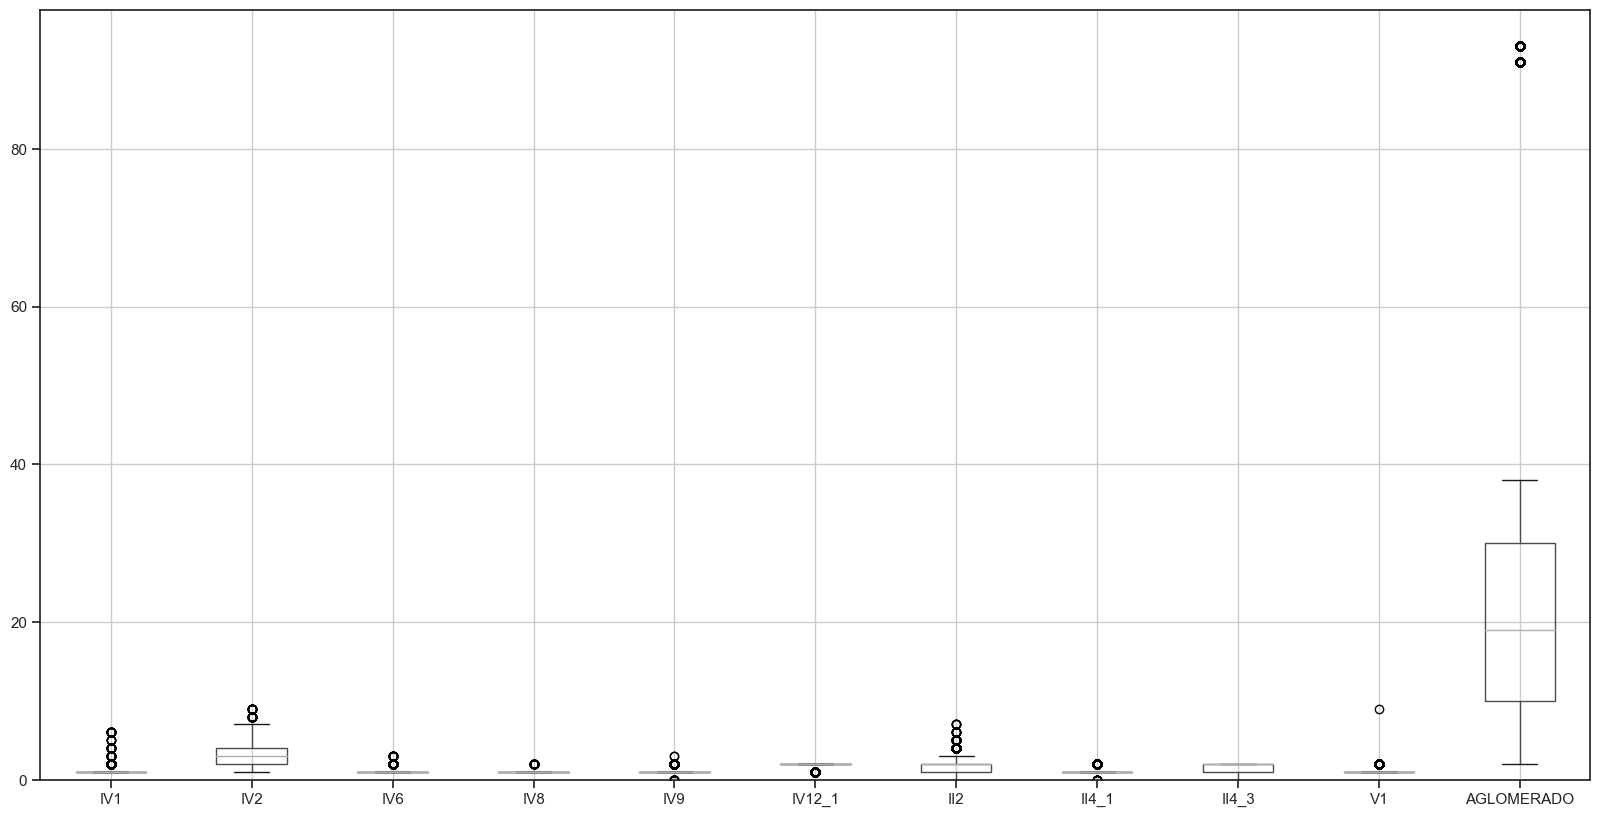

In [12]:
mean_IV2 = np.mean(var20.loc[var20['IV2'] != 99, 'IV2'])
var20.loc[var20['IV2'] == 99, 'IV2'] = mean_IV2
var20['IV2'].value_counts()
#check boxplot again
box=var20.drop(['ITF','IPCF'],axis=1)
box.boxplot(figsize=(20,10))
plt.ylim(0, None)
plt.show()

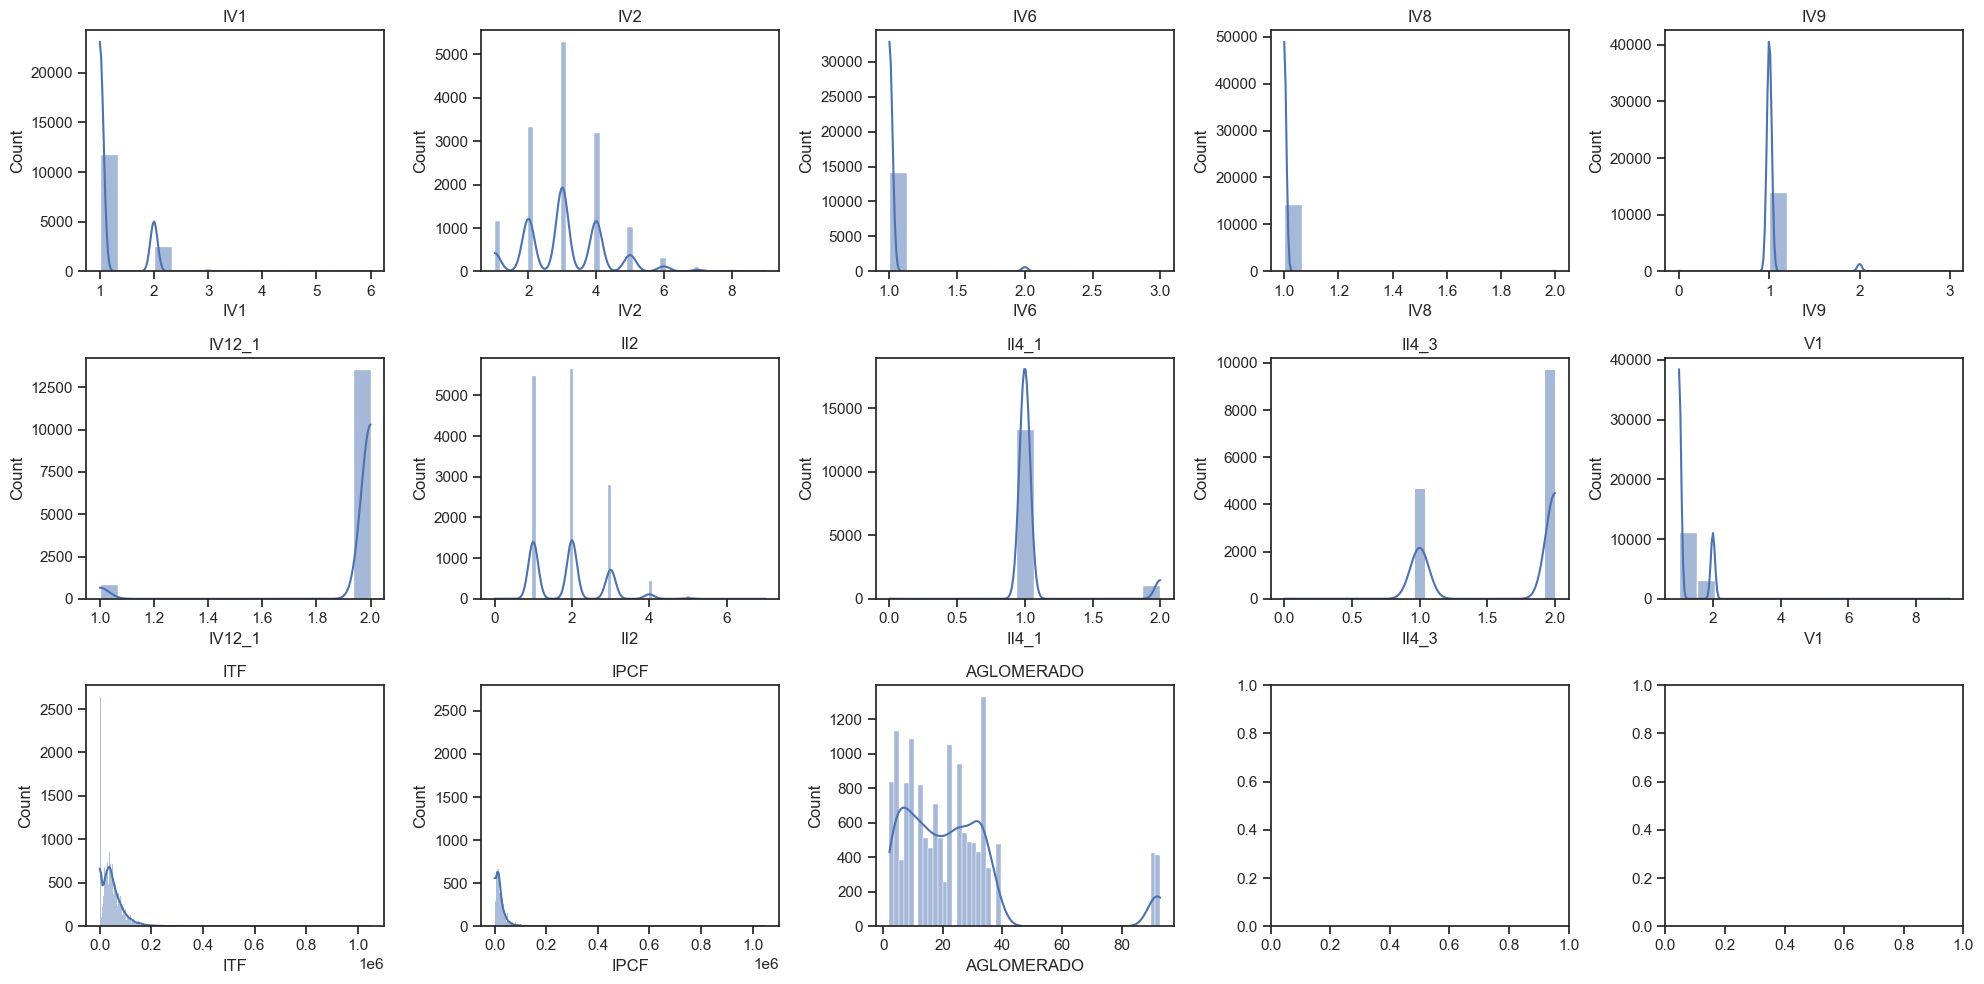

In [13]:
num_rows = 3
num_cols = 5
variable_names = list(var20.columns)
num_figures = len(variable_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=var20[var_name], ax=ax, kde=True)
    ax.set_title(var_name)
plt.tight_layout()
plt.show()

/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_96050/1137872364.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=var20['ITF'], shade=True)


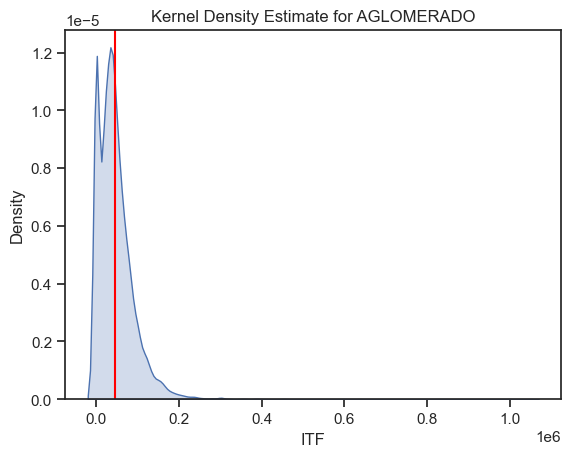

In [14]:
sns.kdeplot(data=var20['ITF'], shade=True)
mean_value = var20['ITF'].mean()
plt.axvline(x=mean_value, color='red')
plt.title(f"Kernel Density Estimate for ITF")
plt.show()

In [15]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(var20)

/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

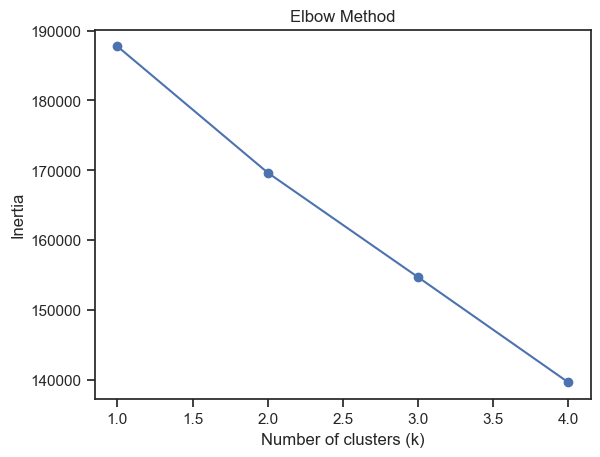

In [16]:
inertia = []
k_values = list(range(1, 5))

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [17]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_clusters = kmeans.fit_predict(data_scaled)

/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


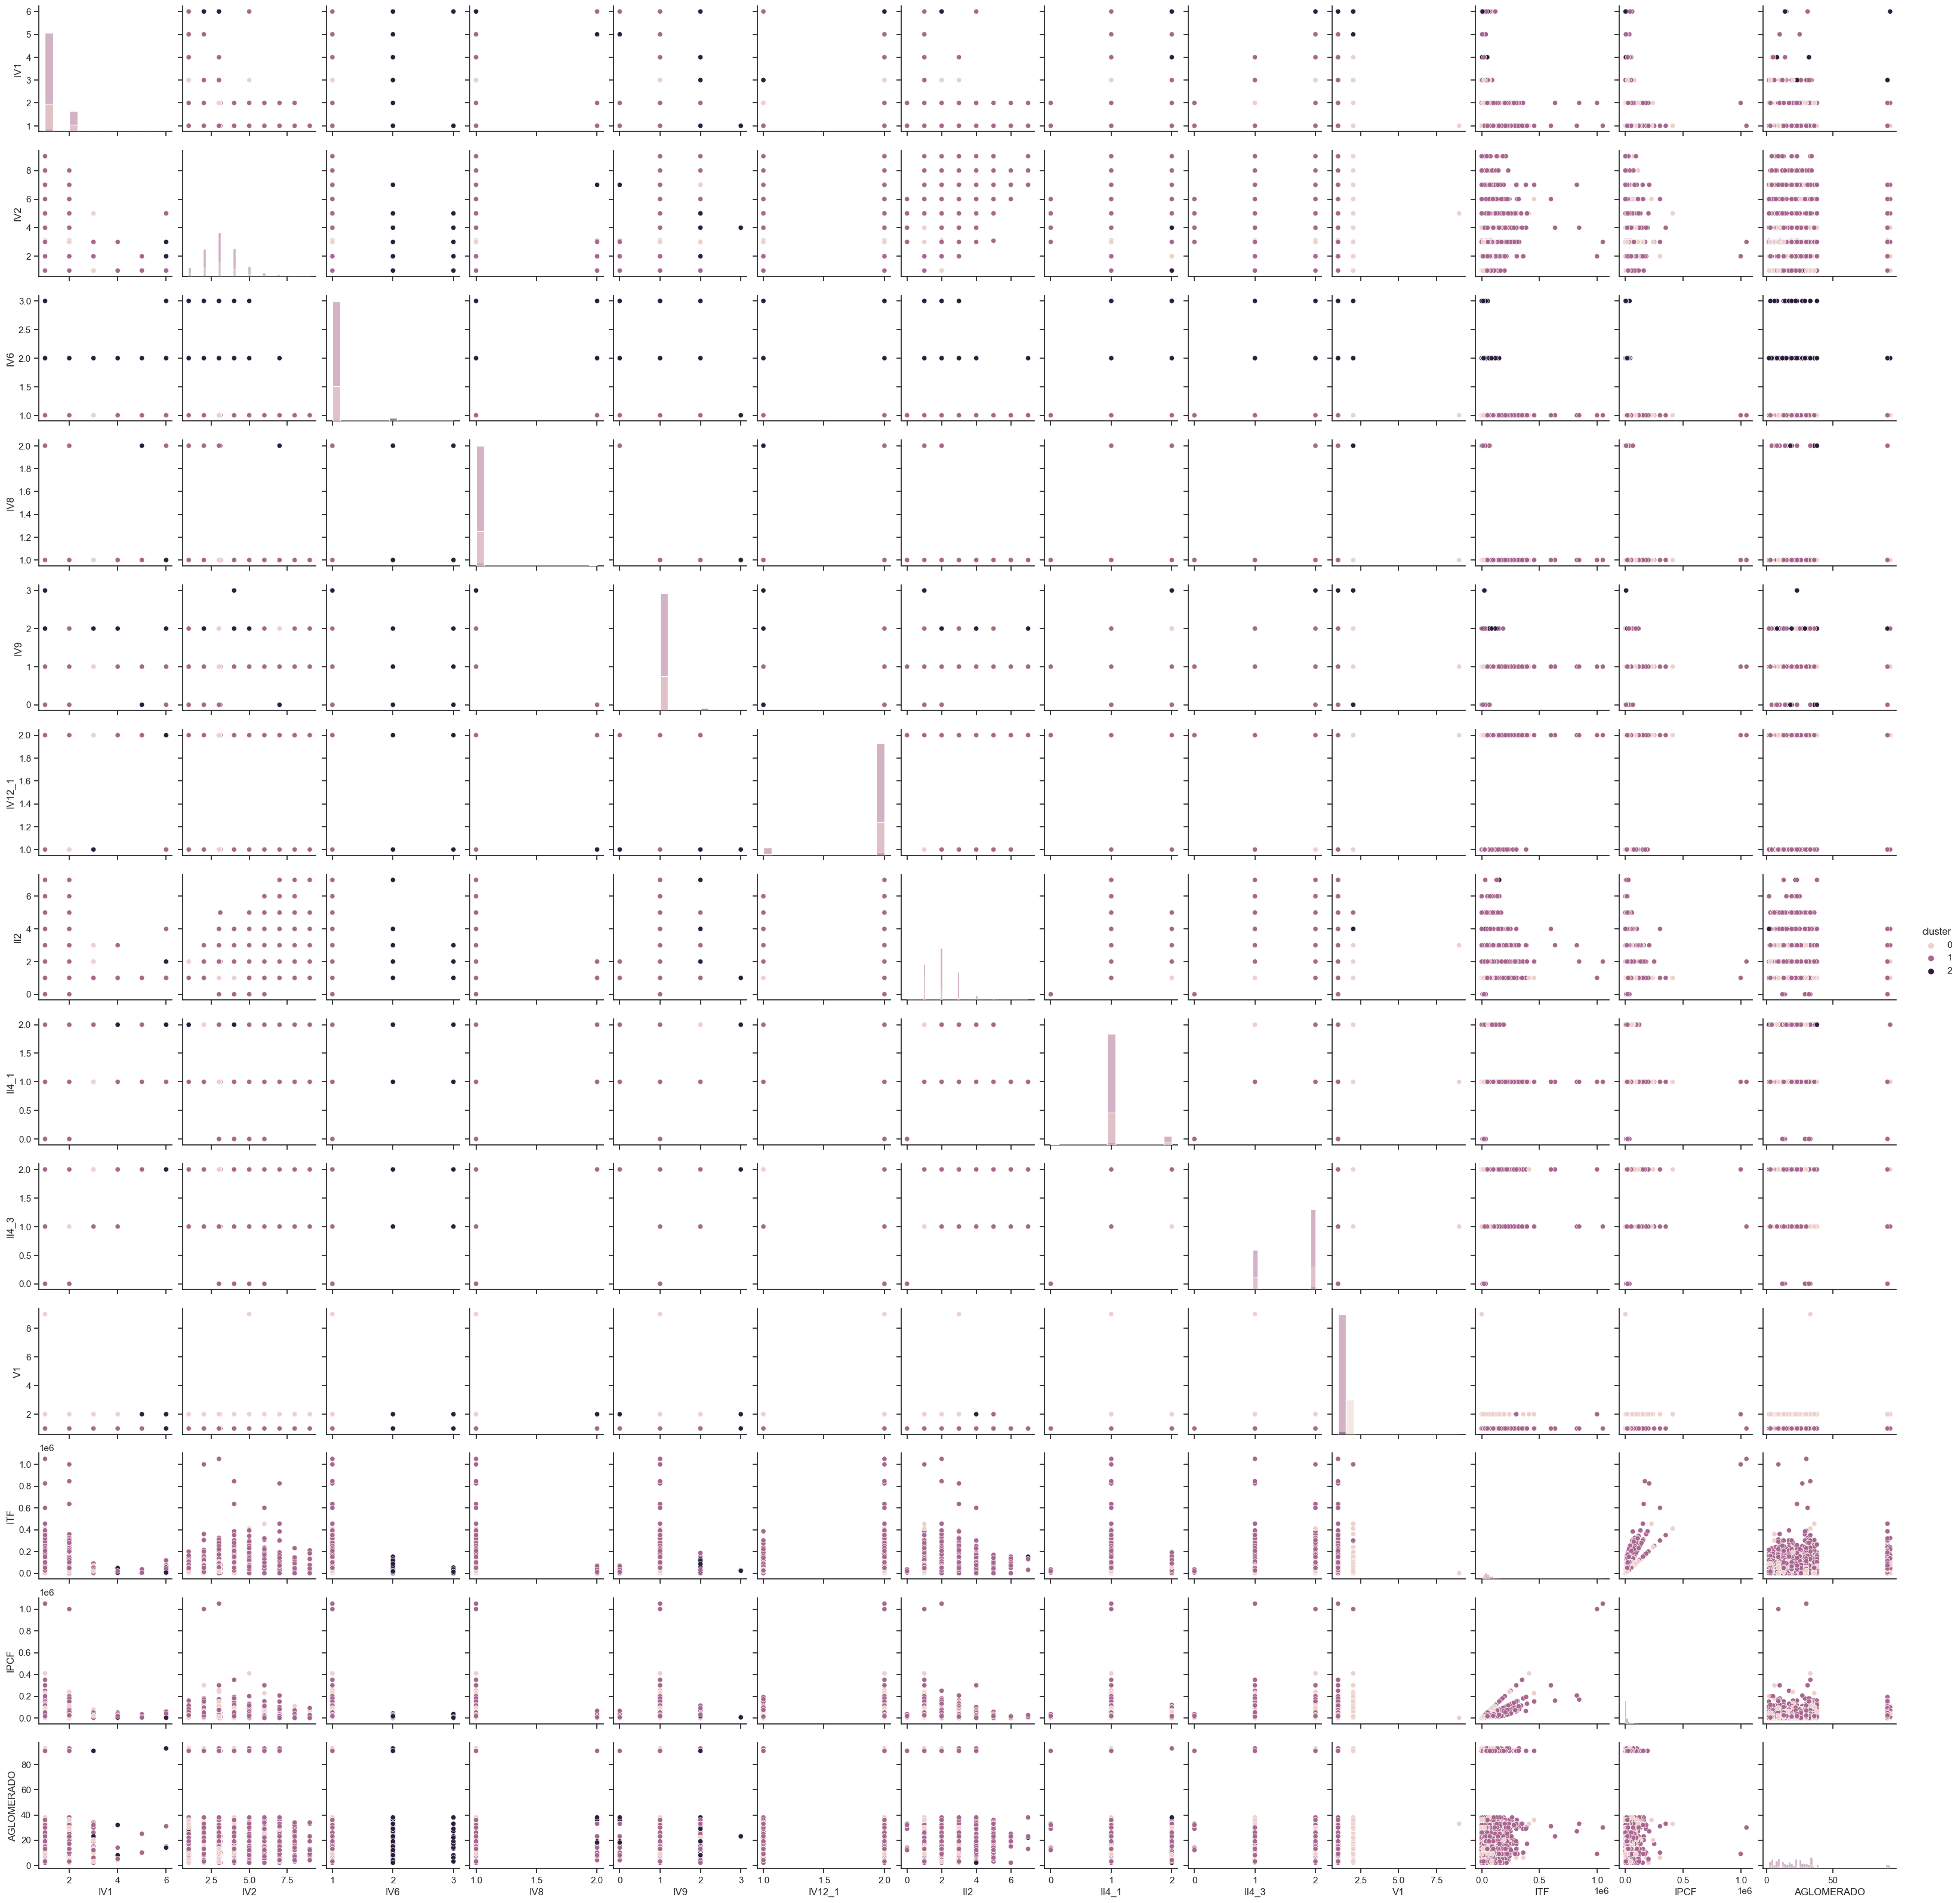

In [20]:
var20_clustered = var20.copy()
var20_clustered['cluster'] = kmeans_clusters
sns.pairplot(var20_clustered, hue='cluster', diag_kind='hist')
plt.show()

In [21]:
#Count of classes
var20_clustered['cluster'].value_counts()

1    10985
0     3164
2      293
Name: cluster, dtype: int64

In [22]:
mean_income = var20_clustered.groupby('cluster')['ITF'].mean()
print(mean_income)

cluster
0    32850.251896
1    50712.160583
2    28640.494881
Name: ITF, dtype: float64


In [23]:
var20_clustered['cluster'] = var20_clustered['cluster'].replace({0:2, 1:3, 2:1})
var20_clustered['cluster'].value_counts()

3    10985
2     3164
1      293
Name: cluster, dtype: int64

# Sexual harrassment
There are 20,950 female victims of sexual harassment in 2020 in the ARGENTINA